### Limpeza de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from io import StringIO

In [2]:
emprestimo = pd.read_csv('emprestimo.csv')
dados_exemplares = pd.read_csv('dados_exemplares.csv')

In [3]:
matricula_alunos = pd.read_csv('matricula_alunos.csv')
usuarios = pd.read_csv('usuarios.csv')

In [4]:
emprestimo.shape

(2258018, 8)

In [5]:
emprestimo.drop_duplicates().shape

(2258018, 8)

In [6]:
dados_exemplares.shape

(546237, 8)

In [7]:
dados_exemplares.drop_duplicates().shape

(546237, 8)

In [8]:
matricula_alunos.shape


(7726, 4)

In [9]:
matricula_alunos.drop_duplicates().shape


(7726, 4)

In [10]:
usuarios.shape

(62802, 4)

In [11]:
usuarios.drop_duplicates().shape

(62802, 4)

In [12]:
emprestimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258018 entries, 0 to 2258017
Data columns (total 8 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   id_emprestimo         int64  
 2   codigo_barras         object 
 3   data_renovacao        object 
 4   data_emprestimo       object 
 5   data_devolucao        object 
 6   matricula_ou_siape    float64
 7   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 137.8+ MB


In [13]:
# removendo coluna desnecessária
emprestimo.drop(columns='Unnamed: 0', inplace=True)

In [14]:
dados_exemplares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546237 entries, 0 to 546236
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             546237 non-null  int64 
 1   id_exemplar       546237 non-null  int64 
 2   codigo_barras     546237 non-null  object
 3   colecao           546237 non-null  object
 4   biblioteca        546237 non-null  object
 5   status_material   546237 non-null  object
 6   localizacao       546237 non-null  int64 
 7   registro_sistema  546237 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 33.3+ MB


In [15]:
dados_exemplares.drop(columns='registro_sistema', inplace=True)
dados_exemplares.drop(columns='index', inplace=True)

#### Materiais x Utilização

In [16]:
# unificando todos os dados
emprestimo_exemplares = emprestimo.merge(dados_exemplares, how = 'left')

In [17]:
emprestimo_exemplares.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1287963
data_emprestimo               0
data_devolucao             6484
matricula_ou_siape         3171
tipo_vinculo_usuario          0
id_exemplar              189258
colecao                  189258
biblioteca               189258
status_material          189258
localizacao              189258
dtype: int64

In [18]:
emprestimo_exemplares.isnull().query('localizacao == True')

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
23,False,False,False,False,False,False,False,True,True,True,True,True
116,False,False,True,False,False,False,False,True,True,True,True,True
127,False,False,False,False,False,False,False,True,True,True,True,True
136,False,False,False,False,False,False,False,True,True,True,True,True
137,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2261712,False,False,True,False,False,False,False,True,True,True,True,True
2261721,False,False,True,False,False,False,False,True,True,True,True,True
2261737,False,False,False,False,True,False,False,True,True,True,True,True
2261740,False,False,True,False,False,False,False,True,True,True,True,True


In [19]:
emprestimo_exemplares.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0


In [20]:
emprestimo_exemplares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261816 entries, 0 to 2261815
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
 7   id_exemplar           float64
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           float64
dtypes: float64(3), int64(1), object(8)
memory usage: 207.1+ MB


##### Criando coluna CDU

In [21]:
emprestimo_exemplares['localizacao'].fillna(value = -1, inplace= True)

In [22]:
# incluindo coluna explicando localização
def localizacao(linha):
  linha = float(linha)
  if linha != -1:  
    if linha <= 999:
      return 'Geografia. Biografia. História'
    elif  linha <= 899:
      return 'Linguagem. Língua. Linguística'
    elif  linha <= 799:
      return 'Belas artes'
    elif  linha <= 699:
      return 'Ciências aplicadas'
    elif  linha <= 599:
      return 'Matemática e ciências naturais'
    elif  linha <= 499:
      return 'Classe vaga. Provisoriamente não ocupada'
    elif  linha <= 399:
      return 'Ciências sociais'
    elif  linha <= 299:
      return 'Religião'
    elif linha <= 199:
      return 'Filosofia e psicologia'
    else:
      return 'Generalidades. Ciência e conhecimento'
  else:
    return 'Sem classificação'

In [23]:
emprestimo_exemplares['CDU'] = emprestimo_exemplares["localizacao"].map(localizacao)

In [24]:
emprestimo_exemplares.query('localizacao == -1')

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
23,709701,L163841,2010/01/19 19:02:53.450000000,2010/01/04 09:48:05.604000000,2010/02/04 18:23:49.946000000,2.008029e+09,ALUNO DE GRADUAÇÃO,NaN,NaN,NaN,NaN,-1.0,Sem classificação
116,709782,L165850,NaN,2010/01/04 14:06:16.699000000,2010/01/22 16:09:20.065000000,2.006213e+08,ALUNO DE GRADUAÇÃO,NaN,NaN,NaN,NaN,-1.0,Sem classificação
127,709793,L178388,2010/01/19 16:31:44.491000000,2010/01/04 14:47:41.976000000,2010/02/01 16:29:17.951000000,2.005063e+08,ALUNO DE GRADUAÇÃO,NaN,NaN,NaN,NaN,-1.0,Sem classificação
136,709802,2009032201,2010/01/19 16:13:22.082000000,2010/01/04 14:57:23.766000000,2010/02/03 14:04:04.222000000,2.009054e+09,ALUNO DE GRADUAÇÃO,NaN,NaN,NaN,NaN,-1.0,Sem classificação
137,709803,L188583,2010/02/01 15:52:28.614000000,2010/01/04 15:03:04.753000000,2010/03/02 17:58:07.985000000,2.010117e+09,ALUNO DE PÓS-GRADUAÇÃO,NaN,NaN,NaN,NaN,-1.0,Sem classificação
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261712,2988987,Y020128,NaN,2020/03/17 19:14:36.276000000,2021/07/30 14:46:13.000000000,2.016093e+09,ALUNO DE GRADUAÇÃO,NaN,NaN,NaN,NaN,-1.0,Sem classificação
2261721,2988996,L202960,NaN,2020/03/17 19:19:44.292000000,2021/07/06 12:17:46.000000000,2.014102e+09,ALUNO DE PÓS-GRADUAÇÃO,NaN,NaN,NaN,NaN,-1.0,Sem classificação
2261737,2989012,C022707,2020/04/03 10:57:09.536000000,2020/03/17 19:31:47.457000000,NaN,2.017006e+10,ALUNO DE GRADUAÇÃO,NaN,NaN,NaN,NaN,-1.0,Sem classificação
2261740,2989015,C020979,NaN,2020/03/17 19:42:58.781000000,2021/01/04 14:24:32.000000000,2.014017e+09,ALUNO DE GRADUAÇÃO,NaN,NaN,NaN,NaN,-1.0,Sem classificação


## Convertendo os demais dados

In [25]:
emprestimo_exemplares['data_renovacao'] = pd.to_datetime(emprestimo_exemplares.loc[:,'data_renovacao'], format="%Y/%m/%d %H:%M:%S", exact= False, errors='coerce')
emprestimo_exemplares['data_devolucao'] = pd.to_datetime(emprestimo_exemplares['data_devolucao'], format="%Y/%m/%d %H:%M:%S", exact= False, errors='coerce')
emprestimo_exemplares['data_emprestimo'] = pd.to_datetime(emprestimo_exemplares['data_emprestimo'],  format="%Y/%m/%d %H:%M:%S", exact= False, errors='coerce')

In [26]:
# Transformando colunas para string
emprestimo_exemplares['id_emprestimo'] = emprestimo_exemplares['id_emprestimo'].astype(str)
emprestimo_exemplares["id_exemplar"] = emprestimo_exemplares["id_exemplar"].astype(str)
emprestimo_exemplares['localizacao'] = emprestimo_exemplares['localizacao'].astype(str)
emprestimo_exemplares['matricula_ou_siape'] = emprestimo_exemplares['matricula_ou_siape'].astype(str)

In [27]:
emprestimo_exemplares.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,NaT,2010-01-04 07:44:10,2010-01-05 16:26:12,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Geografia. Biografia. História
1,709685,L167050,NaT,2010-01-04 07:44:10,2010-01-12 07:34:13,2008023265.0,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,Geografia. Biografia. História
2,709686,2006017618,2010-01-26 08:07:01,2010-01-04 08:08:44,2010-02-25 07:36:25,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,Geografia. Biografia. História
3,709687,L184117,2010-01-18 11:07:46,2010-01-04 08:24:21,2010-02-03 08:58:45,200721119.0,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,Geografia. Biografia. História
4,709684,L095049,NaT,2010-01-04 07:44:10,2010-01-05 16:26:12,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Geografia. Biografia. História


In [28]:
emprestimo_exemplares.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1287963
data_emprestimo               0
data_devolucao             6484
matricula_ou_siape            0
tipo_vinculo_usuario          0
id_exemplar                   0
colecao                  189258
biblioteca               189258
status_material          189258
localizacao                   0
CDU                           0
dtype: int64

In [31]:
# preenchendo dados nulos na coluna matricula_ou_siape
emprestimo_exemplares['colecao'].fillna(value=0, inplace=True)
emprestimo_exemplares['biblioteca'].fillna(value=0, inplace=True)
emprestimo_exemplares['status_material'].fillna(value=0, inplace=True)

In [32]:
emprestimo_exemplares.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1287963
data_emprestimo               0
data_devolucao             6484
matricula_ou_siape            0
tipo_vinculo_usuario          0
id_exemplar                   0
colecao                       0
biblioteca                    0
status_material               0
localizacao                   0
CDU                           0
dtype: int64

In [36]:
emprestimo_exemplares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261816 entries, 0 to 2261815
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_emprestimo         object        
 1   codigo_barras         object        
 2   data_renovacao        datetime64[ns]
 3   data_emprestimo       datetime64[ns]
 4   data_devolucao        datetime64[ns]
 5   matricula_ou_siape    object        
 6   tipo_vinculo_usuario  object        
 7   id_exemplar           object        
 8   colecao               object        
 9   biblioteca            object        
 10  status_material       object        
 11  localizacao           object        
 12  CDU                   object        
dtypes: datetime64[ns](3), object(10)
memory usage: 224.3+ MB


In [35]:
emprestimo_exemplares.to_csv('emprestimo_exemplares.csv')

### Análise

Quantidade de emprestimos x anos

In [38]:
total_emprestimos = len(emprestimo_exemplares['id_emprestimo'].drop_duplicates())
total_emprestimos

2257981

In [58]:
datas = { 'Ano_emprestimo': emprestimo_exemplares['data_emprestimo'].dt.year,
         'Mes_emprestimo': emprestimo_exemplares['data_emprestimo'].dt.strftime('%b'),
          'dia_emprestimo': emprestimo_exemplares['data_emprestimo'].dt.strftime('%a'),
          'hora_emprestimo': emprestimo_exemplares['data_emprestimo'].dt.hour,
          'Ano_renovacao': emprestimo_exemplares['data_renovacao'].dt.year,
          'Mes_renovacao': emprestimo_exemplares['data_renovacao'].dt.strftime('%b'),
          'dia_renovacao': emprestimo_exemplares['data_renovacao'].dt.strftime('%a'),
          'hora_renovacao': emprestimo_exemplares['data_renovacao'].dt.hour,
          'Ano_devolucao': emprestimo_exemplares['data_devolucao'].dt.year,
          'Mes_devolucao': emprestimo_exemplares['data_devolucao'].dt.strftime('%b'),
          'dia_devolucao': emprestimo_exemplares['data_devolucao'].dt.strftime('%a'),
          'hora_devolucao': emprestimo_exemplares['data_devolucao'].dt.hour
           }
datas = pd.DataFrame(datas)

In [ ]:
datas.head()

,Ano_emprestimo,Mes_emprestimo,dia_emprestimo,hora_emprestimo,Ano_renovacao,Mes_renovacao,dia_renovacao,hora_renovacao,Ano_devolucao,Mes_devolucao,dia_devolucao,hora_devolucao
0,2010,1,Mon,7,NaN,NaN,NaN,NaN,2010.0,1.0,Tue,16.0
1,2010,1,Mon,7,NaN,NaN,NaN,NaN,2010.0,1.0,Tue,7.0
2,2010,1,Mon,8,2010.0,1.0,Tue,8.0,2010.0,2.0,Thu,7.0
3,2010,1,Mon,8,2010.0,1.0,Mon,11.0,2010.0,2.0,Wed,8.0
4,2010,1,Mon,7,NaN,NaN,NaN,NaN,2010.0,1.0,Tue,16.0


In [43]:
datas['id_emprestimo'] = emprestimo_exemplares['id_emprestimo']

C:\Users\mihvi\AppData\Local\Temp\ipykernel_12228\395140925.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'Ano_emprestimo', data = datas, kind = 'count', aspect = 2,


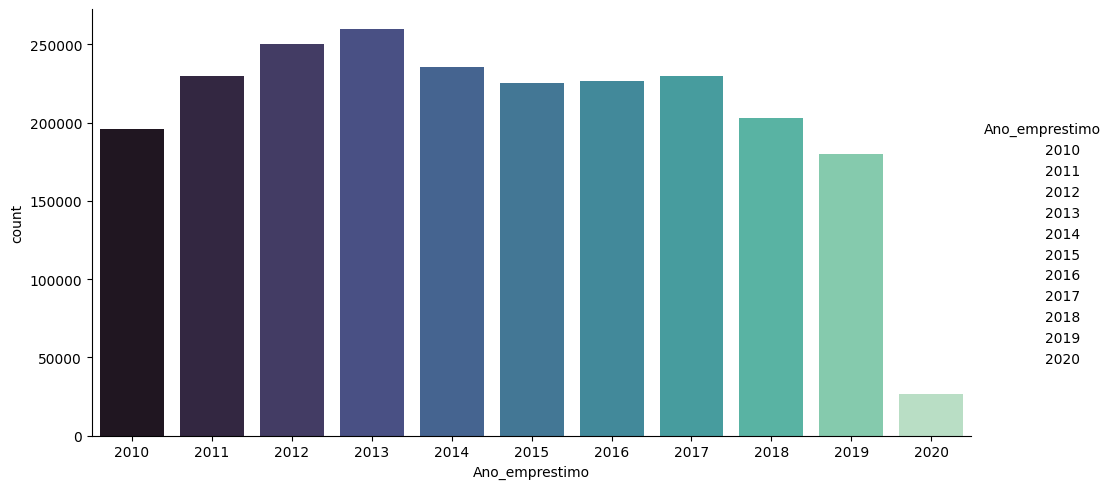

In [46]:
sns.catplot(x = 'Ano_emprestimo', data = datas, kind = 'count', aspect = 2,
                        palette = "mako")

In [57]:
# emprestimos x mês
datas.Mes_emprestimo.value_counts()

Mes_emprestimo
3     275780
8     253099
4     230339
9     227147
2     226945
5     223233
10    206765
11    180909
6     151948
7     130812
12     82627
1      72212
Name: count, dtype: int64

In [ ]:
mes_l = datas['Mês_emprestimo'].value_counts().reset_index()

In [ ]:
sns.barplot(x = 'index', y = 'data_emprestimo', data = mes_l, palette = "mako")

In [ ]:
sns.lineplot(data = datas, y = 'hora_emprestimo', x = 'dia_emprestimo')

In [ ]:
datas['hora_emprestimo'].value_counts()